### Image Gradients
Image gradients are often calculated in images, as part of image processing and computer vision (i.e. edge detection and motion estimation).

In [383]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from scipy import signal, ndimage
import time

In [276]:
def imshow(img):
    plt.imshow(img, cmap='gray')

In [277]:
def gaussian_blur(img):
    g = np.array([
        [1, 4, 7, 4, 1],
        [4, 16, 26, 16, 4],
        [7, 26, 41, 26, 7],
        [4, 16, 26, 16, 4],
        [1, 4, 7, 4, 1],
    ])
    
    return (1/273) * signal.convolve(img, g)

(450, 600)


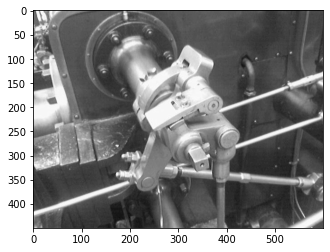

In [317]:
img = cv2.imread('steam_engine.png', 0)
print(img.shape)
imshow(img)

In [318]:
# Sobel Filters
gx = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]])
gy = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]])

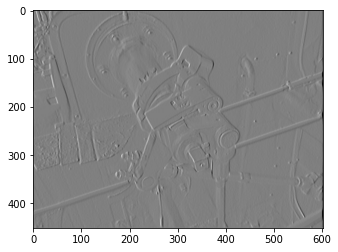

In [319]:
# X direction
gradients_x = signal.convolve2d(img, gx)
plt.imshow(gradients_x, cmap='gray');

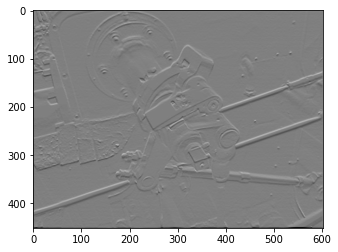

In [320]:
# Y direction
gradients_y = signal.convolve2d(img, gy)
plt.imshow(gradients_y, cmap='gray');

In [331]:
def sobel(img, Gx, Gy, threshold=None):
    start = time.time()
    rows = img.shape[0]
    columns = img.shape[1]
    mag = np.zeros_like(img)
    
    for i in range(1, rows-2):
        for j in range(1, columns-2):
            s1 = np.sum(np.sum(img[i:i+3, j:j+3] * Gx, axis=0))
            s2 = np.sum(np.sum(img[i:i+3, j:j+3] * Gy, axis=1))
            # s1 = np.sum(np.sum((np.array([[1],[2],[1]]) @ np.array([[-1, 0, 1]])) * img[i:i+3, j:j+3], axis=0))
            # s2 = np.sum(np.sum((np.array([[-1],[0],[1]]) @ np.array([[1, 2, 1]])) * img[i:i+3, j:j+3], axis=1))
            #s1 = np.sum(np.sum(signal.convolve2d(img[i:i+3, j:j+3], Gx), axis=1))
            #s2 = np.sum(np.sum(signal.convolve2d(img[i:i+3, j:j+3], Gy), axis=0))

            mag[i+1][j+1] = np.sqrt(s1**2 + s2**2)
    
    # Normalize
    mag = 255.0*mag/np.max(mag)
    
    if threshold:
        threshold = 70 # varies for application [0 255]
        mag[mag < threshold] = threshold
        mag[mag == round(threshold)] = 0
    
    print(f'Done in {(time.time()-start):.1f}s')
    return mag

Done in 6.9s
Done in 7.2s


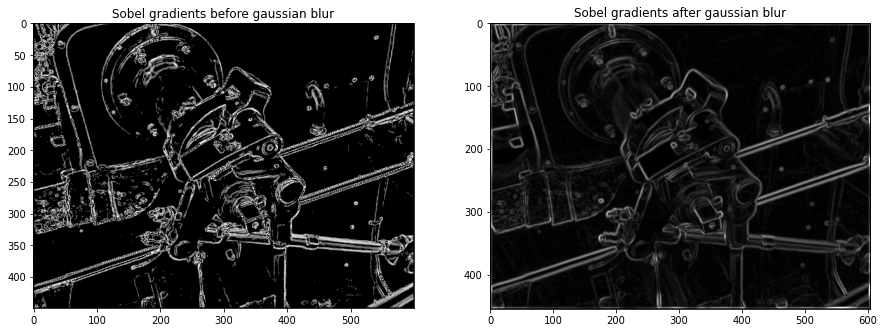

In [389]:
img = cv2.imread('steam_engine.png', 0)

# Sobel Operator
sobel_gx = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]])
sobel_gy = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]])


f, axarr = plt.subplots(1,2, figsize=(15,12))

sobel_gradients = sobel(img, sobel_gx, sobel_gy, threshold=70)
axarr[0].set_title('Sobel gradients before gaussian blur')
axarr[0].imshow(sobel_gradients, cmap='gray')

blurred = gaussian_blur(img)
sobel_gradients = sobel(blurred, sobel_gx, sobel_gy)
axarr[1].set_title('Sobel gradients after gaussian blur')
axarr[1].imshow(sobel_gradients, cmap='gray');

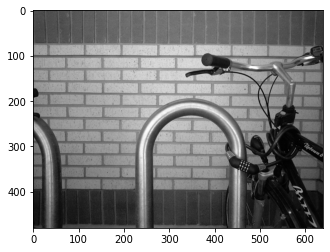

In [379]:
img = cv2.imread('bike.jpg', 0)
imshow(img)

Done in 8.1s
Done in 8.2s


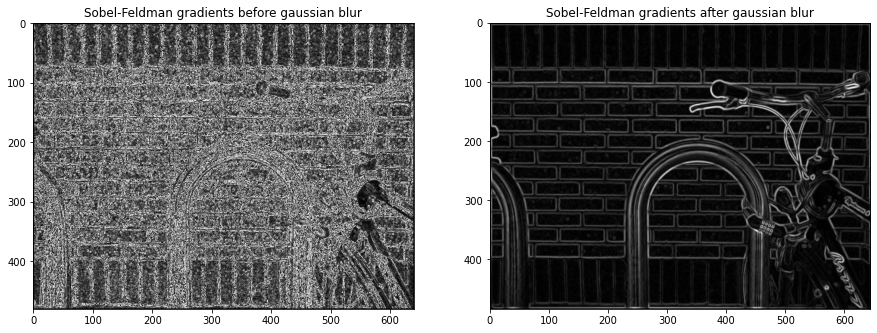

In [382]:
# Sobel-Feldman Operator
sf_gx = np.array([
    [3, 0, -3],
    [10, 0, -10],
    [3, 0, -3]])
sf_gy = np.array([
    [3, 10, 3],
    [0, 0, 0],
    [-3, -10, -3]])

f, axarr = plt.subplots(1,2, figsize=(15,12))

sobel_gradients = sobel(img, sf_gx, sf_gy)
axarr[0].set_title('Sobel-Feldman gradients before gaussian blur')
axarr[0].imshow(sobel_gradients, cmap='gray')

# Best results found with own gaussian blur method defined at top
blurred = gaussian_blur(img)
#blurred = cv2.GaussianBlur(img, (5, 5), 100)
#blurred = cv2.medianBlur(img, 5)
# blurred = cv2.bilateralFilter(img, 9, 75, 75)
sobel_gradients = sobel(blurred, sf_gx, sf_gy)
axarr[1].set_title('Sobel-Feldman gradients after gaussian blur')
axarr[1].imshow(sobel_gradients, cmap='gray');